<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/240909_%EA%B3%BC%EC%A0%9C_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4 모델 훈련**
**선형 회귀**
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.
2. 경사하강법(GD)라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다. 경사 하강법의 변종인 배치(batch) 경사 하강법, 미니배치(mini-batch) 경사 하강법, 확률적(stochastic) 경사 하강법(SGD)도 살펴본다.

**다항 회귀** : 비선형 데이터셋에 훈련시킬 수 있는 모델. 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과적합되기 쉽다.
1. 학습 곡선(learning curve)을 사용해 모델이 과적합되는지 감지하는 방법을 살펴보자.
2. 훈련 세트의 과적합을 감소시킬 수 있는 규제 기법을 알아보자.

**로지스틱 회귀, 소프트맥스 회귀**

## **4.1 선형 회귀**

$$삶의 만족도 = \theta_0 + \theta_1 \times 1인당_{GDP}$$
이 모델은 입력 특성인 1인당_GDP에 대한 선형 함수이다. $\theta_0$와 $\theta_1$이 모델 파라미터이다.

더 일반적으로 선형 모델은 [식 4-1]에서처럼 입력 특성의 가중치 합과 편향(bias)(또는 절편(intercept))이라는 상수를 더해 예측을 만든다.

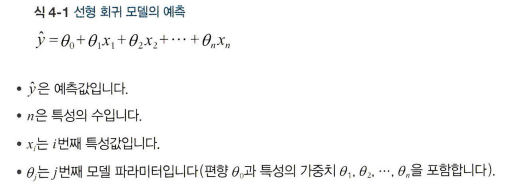

이 식은 [식 4-2]처럼 벡터 형태로 더 간단하게 쓸 수 있다.

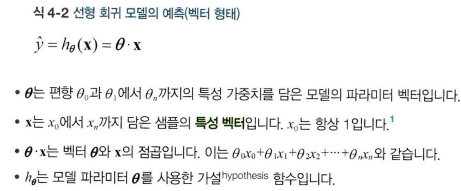

머신러닝에서는 종종 벡터를 하나의 열을 가진 2D 배열인 열 벡터(column vector)로 나타낸다. $\theta$와 x가 열 벡터라면 예측은 $\hat{y}=\theta'x$이다. 여기에서 $\theta'$는 $\theta$의 전치(transpose)이다(열 벡터가 아니라 행 벡터가 된다).

모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 회귀에서 가장 많이 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로) 더 간단하다.

훈련 세트 x에 대한 선형 회귀 가설 $h_{\theta}$의 MSE는 [식 4-3]처럼 계산한다. 편의상 벡터 표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\theta_{0}에 가상의 특성 $x_{0}=1$이 곱해졌다고 생각한다. 최종 모델을 평가하는 데 사용하는 성능 측정 지표 말고 학습 알고리즘이 다른 함수를 최적화하는 경우가 종종 있다. 일반적으로 성능 측정 지표에는 없는 유용한 미분 특성이 있어서 이런 함수가 계산하기 더 쉽거나, 훈련하는 동안 모델에 제약을 가하기 위해 사용한다.

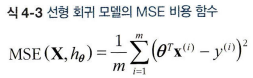

### **4.4.1 정규방정식**

비용 함수를 최소화하는 $\theta$ 값을 찾기 위한 해석적인 방법이 있다. 이를 정규방정식이라고 한다.

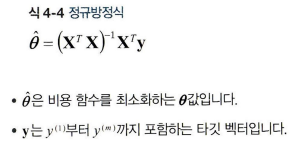

In [1]:
import numpy as np
X=2*np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)

In [2]:
X_b=np.c_[np.ones((100, 1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.84842401],
       [3.11753099]])

In [4]:
X_new=np.array([[0], [2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.84842401],
       [10.08348599]])

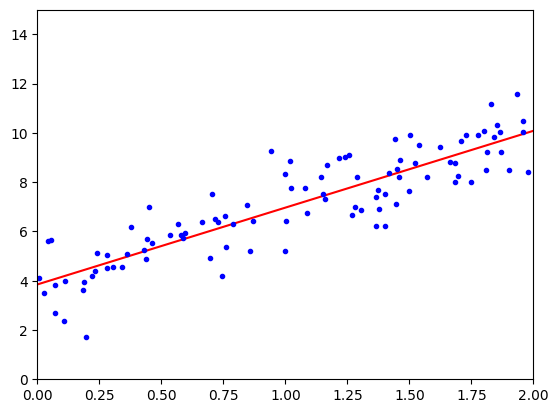

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([3.84842401]), array([[3.11753099]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.84842401],
       [10.08348599]])

In [9]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.84842401],
       [3.11753099]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.84842401],
       [3.11753099]])

In [11]:
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [12]:
theta

array([[3.84842401],
       [3.11753099]])

In [13]:
n_epochs=50
t0, t1=5, 50 # 학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [14]:
theta

array([[3.83088461],
       [3.129775  ]])

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.82722594]), array([3.10524155]))

In [17]:
m=100
X=6*np.random.rand(m, 1)-3
y=0.5*X**2+X+2+np.random.randn(m, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([0.23674454])

In [19]:
X_poly[0]

array([0.23674454, 0.05604798])

In [20]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01889567]), array([[0.94627938, 0.43260583]]))

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

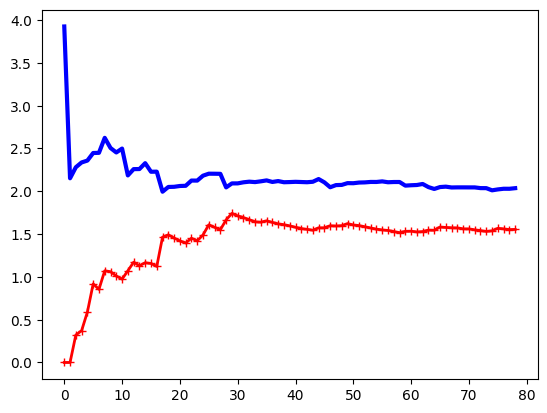

In [22]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

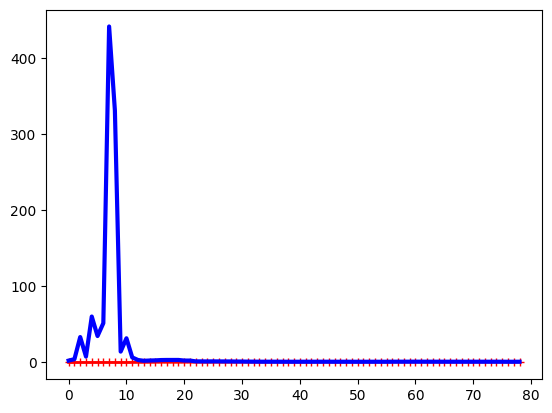

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [24]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.7897034]])

In [25]:
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.76070848])

In [26]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.74712585])

In [27]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.74919292])

In [28]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 준비
poly_scaler=Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error=float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행한다.
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

In [29]:
from sklearn import datasets

iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [30]:
X=iris['data'][:, 3:] # 꽃잎의 너비
y=(iris["target"]==2).astype(int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

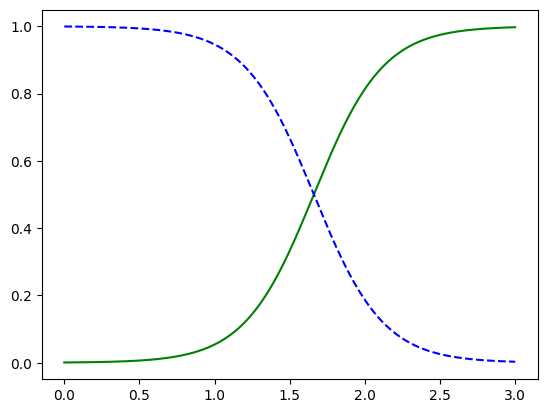

In [32]:
X_new=np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not iris virginica')

In [33]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [34]:
X=iris['data'][:, (2, 3)] # 꽃잎의 길이, 너비
y=iris['target']

softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5, 2]])

array([2])

In [36]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])